In [1]:
import sys
sys.path.append("../../..")

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from src.adapters.detectors import MockDetector
from src.app.configs.detectors import MockDetectorConfig
from src.adapters.cameras import MockCamera
from src.app.configs.cameras import MockCameraConfig

In [2]:
camera_config = MockCameraConfig(
    width=640,
    height=320,
    fps=144,
)
camera = MockCamera(camera_config)

In [3]:
detector_config = MockDetectorConfig(
    class_ids=range(3),
    confidence_range=(0.5, 0.95),
    detections_num_range=(0, 5)
)
detector = MockDetector(detector_config)

In [4]:
frame = camera.read()
detections = detector.detect(frame)

In [5]:
detections

[Detection(class_id=0, confidence=0.7367469780244664, bbox=(327, 59, 527, 288)),
 Detection(class_id=1, confidence=0.6196857450147517, bbox=(457, 88, 631, 116)),
 Detection(class_id=2, confidence=0.5388550520856574, bbox=(80, 49, 221, 223)),
 Detection(class_id=1, confidence=0.5566732860564982, bbox=(135, 183, 381, 204))]

(np.float64(-0.5), np.float64(639.5), np.float64(319.5), np.float64(-0.5))

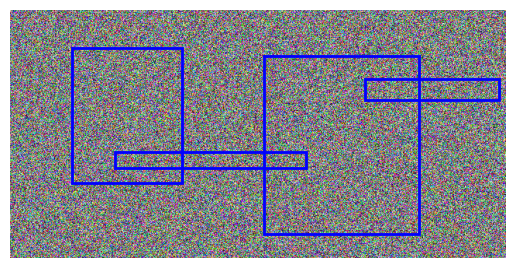

In [7]:
fig, ax = plt.subplots(1, 1)
plt.imshow(frame)

for det in detections:
    bbox = patches.Rectangle(
        xy=det.bbox[:2], 
        width=det.bbox[2] - det.bbox[0], 
        height=det.bbox[3] - det.bbox[1], 
        linewidth=2, 
        edgecolor='blue', 
        facecolor='none'
    )
    ax.add_patch(bbox)

plt.axis('off')